# Credit Card Fraud Detection : Algorithm Comparison ( Traditional vs Deep learning approach )

Objective:

The main objective of this dataset is to develop a machine learning model that can accurately classify credit card transactions as either fraudulent or non-fraudulent based on the provided attributes. By training and evaluating such a model, financial institutions can enhance their fraud detection mechanisms and prevent financial losses associated with fraudulent transactions.

List of Models

1. Random Forest

2. Decision Tree

3. K-nearest neighbor

4. Logistic regression

5. Convoluted Neural Network(CNN)

6. Recurrent Neural Network(RNN)

Data Description

This dataset contains information related to credit card transactions, with a focus on fraud detection. The dataset has a total of 12 columns, each providing different attributes associated with credit card transactions. The goal of this dataset is to develop a predictive model that can accurately identify fraudulent credit card transactions based on these attributes.

Dataset Columns:

Merchant_id: An identifier for the merchant involved in the transaction.

Transaction date: The date of the transaction. (Note: All entries in this column are missing values, so this column might not be useful for analysis.)

Average Amount/transaction/day: The average amount of transactions made per day.

Transaction_amount: The amount of the transaction.

Is declined: Indicates whether the transaction was declined.

Total Number of declines/day: The total number of transaction declines per day.

isForeignTransaction: Indicates whether the transaction is a foreign transaction (made in a different country).

isHighRiskCountry: Indicates whether the transaction involves a high-risk country.

Daily_chargeback_avg_amt: The average amount of chargebacks per day.

6_month_avg_chbk_amt: The average chargeback amount over the last six months.

6-month_chbk_freq: The frequency of chargebacks over the last six months.

isFradulent: The target variable, indicating whether the transaction is fraudulent or not.


# Code workflow

1. Importing libraries , dataset and initial EDA

2. Detailed Exploratory Data Analysis

3. Model specific data preprocessing

4. Model building and evaluation

5. Model comparison and visualization

## Section 1 : Importing libraries , dataset and initial EDA

In [1]:
! pip install tensorflow

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import LSTM,Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


# Other Libraries
import warnings
warnings.filterwarnings("ignore")

Dataset onboarding and basic EDA

In [3]:
fraud = pd.read_csv('creditcardcsvpresent.csv')

In [4]:
fraud.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [5]:
fraud.shape

(3075, 12)

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [7]:
fraud.describe()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,0.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,NaN,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,NaN,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,NaN,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,NaN,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,NaN,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,NaN,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,NaN,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [8]:
fraud.describe(include='O')

,Is declined,isForeignTransaction,isHighRiskCountry,isFradulent
count,3075,3075,3075,3075
unique,2,2,2,2
top,N,N,N,N
freq,3018,2369,2870,2627


In [11]:
fraud.isnull().sum()

,0
Merchant_id,0
Transaction date,3075
Average Amount/transaction/day,0
Transaction_amount,0
Is declined,0
Total Number of declines/day,0
isForeignTransaction,0
isHighRiskCountry,0
Daily_chargeback_avg_amt,0
6_month_avg_chbk_amt,0


In [12]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [21]:
fraud = fraud.drop(columns = ['Merchant_id' , 'Transaction date'] , axis=1)

In [23]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Amount/transaction/day  3075 non-null   float64
 1   Transaction_amount              3075 non-null   float64
 2   Is declined                     3075 non-null   object 
 3   Total Number of declines/day    3075 non-null   int64  
 4   isForeignTransaction            3075 non-null   object 
 5   isHighRiskCountry               3075 non-null   object 
 6   Daily_chargeback_avg_amt        3075 non-null   int64  
 7   6_month_avg_chbk_amt            3075 non-null   float64
 8   6-month_chbk_freq               3075 non-null   int64  
 9   isFradulent                     3075 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 240.4+ KB


In [24]:
fraud.describe()

,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [25]:
fraud.columns

Index(['Average Amount/transaction/day', 'Transaction_amount', 'Is declined',
       'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

In [32]:
#Turning categorical attributes into binary attributes

fraud = fraud.replace(to_replace={'N':0,'Y':1})

## Section 2 : Detailed Exploratory Data Analysis

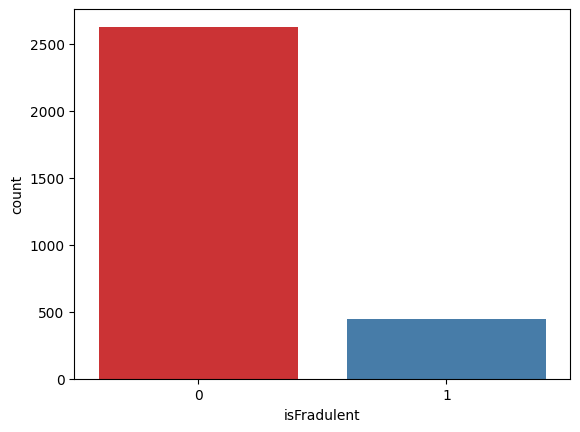

In [35]:
# Visualisation of fradulent and legitimate data
sns.countplot(x="isFradulent", data=fraud , palette='Set1')
plt.show()

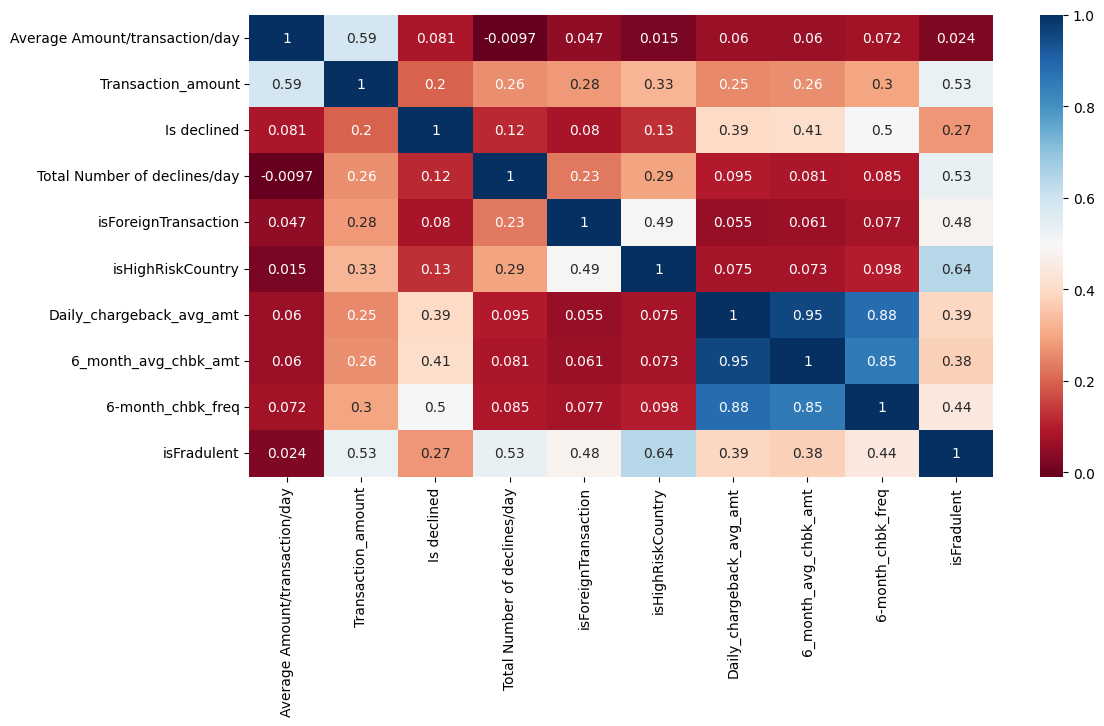

In [39]:
# Heatmap for correlation
plt.figure(figsize=(12,6))
sns.heatmap(fraud.corr(), cmap='RdBu' , annot=True)
plt.show()

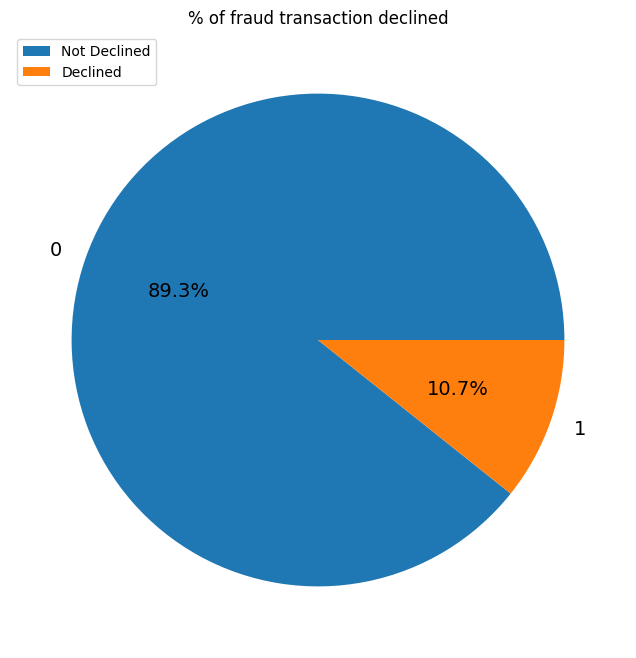

In [40]:
FRAUD = fraud.loc[fraud.isFradulent == 1]
declined = FRAUD.groupby(['Is declined']).sum()

f, axes = plt.subplots(1,1, figsize=(8,8))
axes.set_title("% of fraud transaction declined")
declined.plot(kind='pie',y='isFradulent',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Declined','Declined'])
plt.show()

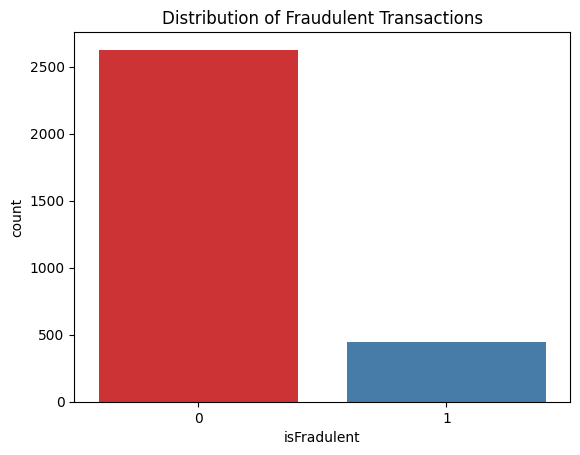

In [41]:
# Distribution of the target variable
sns.countplot(x='isFradulent', data=fraud , palette = 'Set1')
plt.title('Distribution of Fraudulent Transactions')
plt.show()

In [43]:
fraud.columns

Index(['Average Amount/transaction/day', 'Transaction_amount', 'Is declined',
       'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

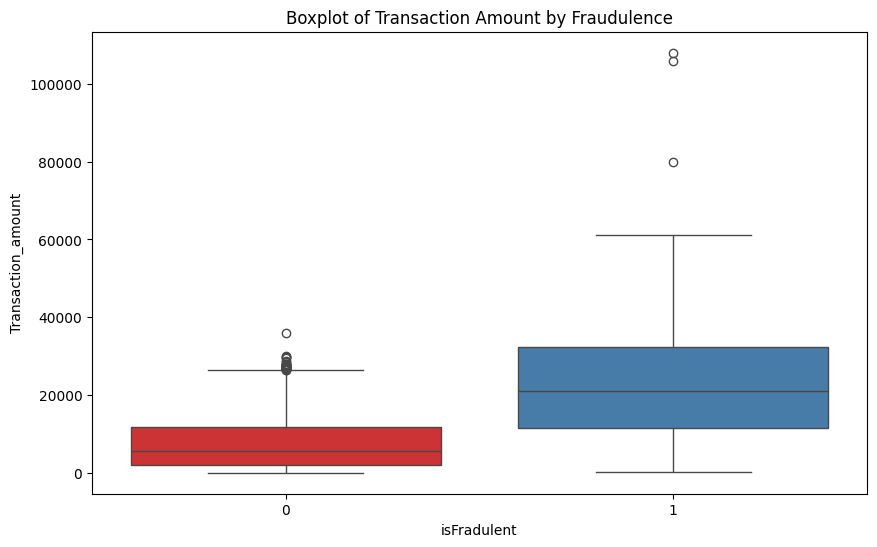

In [49]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFradulent', y='Transaction_amount', data=fraud , palette = 'Set1')
plt.title('Boxplot of Transaction Amount by Fraudulence')
plt.show()

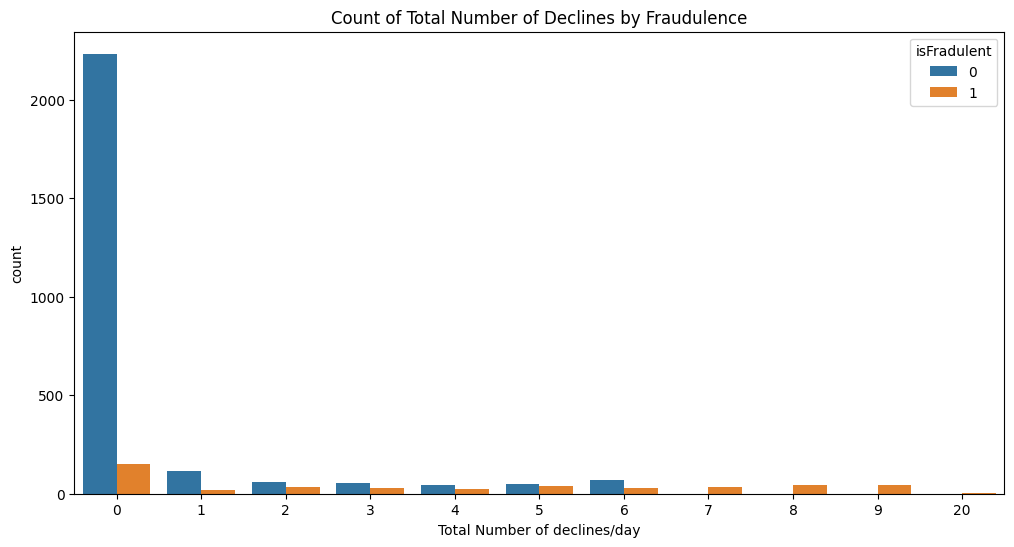

In [50]:
# Count plots
plt.figure(figsize=(12, 6))
sns.countplot(x='Total Number of declines/day', hue='isFradulent', data=fraud)
plt.title('Count of Total Number of Declines by Fraudulence')
plt.show()

Exploring Is declined:



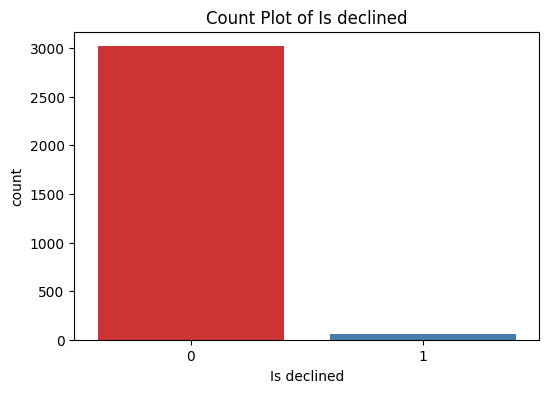

Percentage Distribution:
Is declined
0    98.146341
1     1.853659
Name: proportion, dtype: float64


Exploring isForeignTransaction:



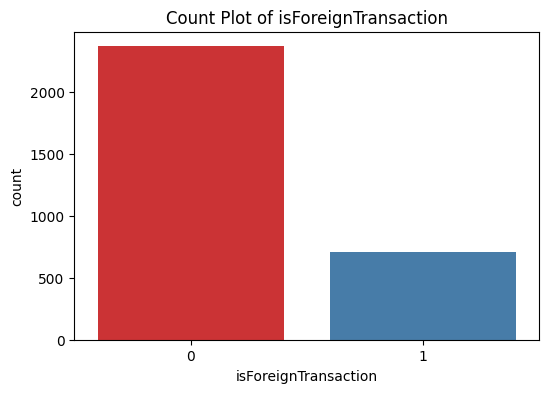

Percentage Distribution:
isForeignTransaction
0    77.04065
1    22.95935
Name: proportion, dtype: float64


Exploring isHighRiskCountry:



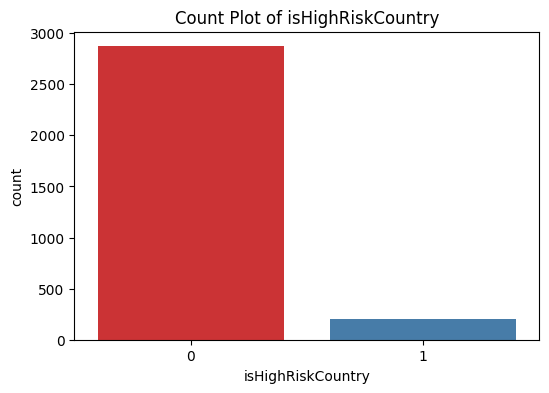

Percentage Distribution:
isHighRiskCountry
0    93.333333
1     6.666667
Name: proportion, dtype: float64


Exploring isFradulent:



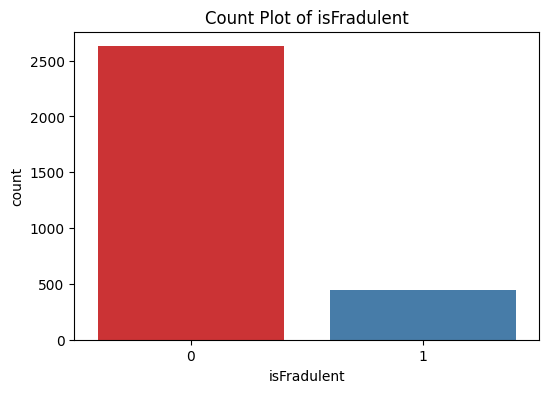

Percentage Distribution:
isFradulent
0    85.430894
1    14.569106
Name: proportion, dtype: float64




In [52]:
# List of categorical columns
categorical_columns = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']

# Explore each categorical column
for column in categorical_columns:
    print(f"Exploring {column}:\n")

    # Count plot
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=fraud , palette = 'Set1')
    plt.title(f'Count Plot of {column}')
    plt.show()

    # Percentage distribution
    column_dist = fraud[column].value_counts(normalize=True) * 100
    print("Percentage Distribution:")
    print(column_dist)
    print("\n")

In [53]:
# List of columns to explore
columns_to_explore = ['Average Amount/transaction/day', 'Transaction_amount',
                      'Is declined', 'Total Number of declines/day',
                      'isForeignTransaction', 'isHighRiskCountry',
                      'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
                      '6-month_chbk_freq', 'isFradulent']

Exploring Average Amount/transaction/day:

Missing Values: 0
Data Type: float64
Basic Statistics:
count    3075.000000
mean      515.026556
std       291.906978
min         4.011527
25%       269.788047
50%       502.549575
75%       765.272803
max      2000.000000
Name: Average Amount/transaction/day, dtype: float64


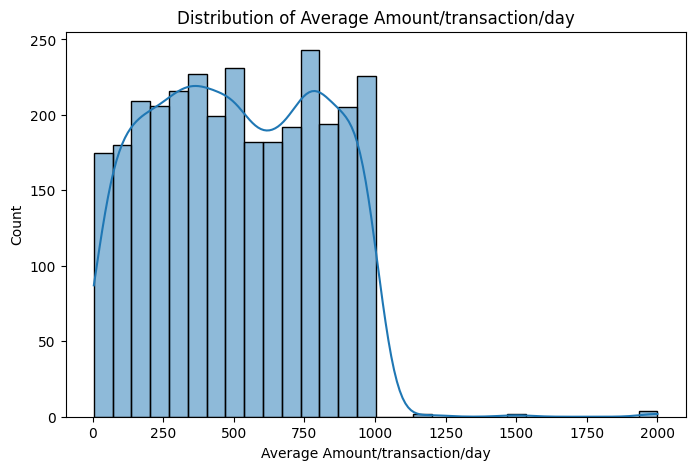



Exploring Transaction_amount:

Missing Values: 0
Data Type: float64
Basic Statistics:
count      3075.000000
mean       9876.399210
std       10135.331016
min           0.000000
25%        2408.781147
50%        6698.891856
75%       14422.568935
max      108000.000000
Name: Transaction_amount, dtype: float64


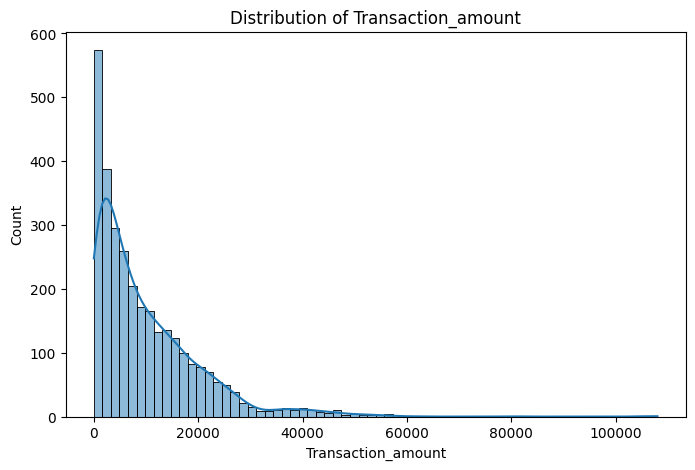



Exploring Is declined:

Missing Values: 0
Data Type: int64
Basic Statistics:
count    3075.000000
mean        0.018537
std         0.134903
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Is declined, dtype: float64


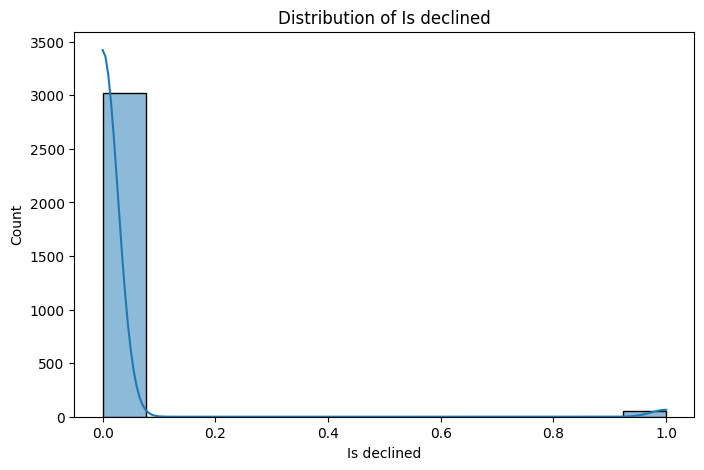



Exploring Total Number of declines/day:

Missing Values: 0
Data Type: int64
Basic Statistics:
count    3075.000000
mean        0.957398
std         2.192391
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: Total Number of declines/day, dtype: float64


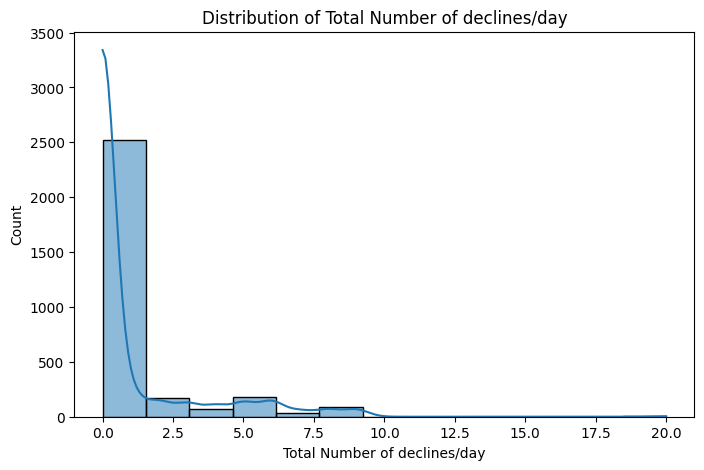



Exploring isForeignTransaction:

Missing Values: 0
Data Type: int64
Basic Statistics:
count    3075.000000
mean        0.229593
std         0.420640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: isForeignTransaction, dtype: float64


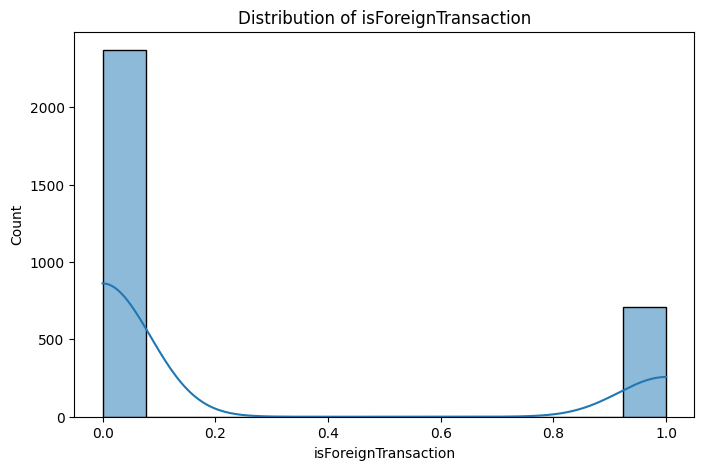



Exploring isHighRiskCountry:

Missing Values: 0
Data Type: int64
Basic Statistics:
count    3075.000000
mean        0.066667
std         0.249484
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: isHighRiskCountry, dtype: float64


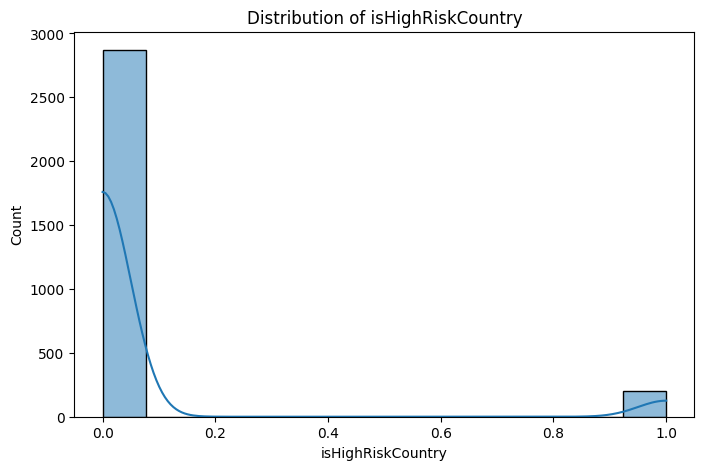



Exploring Daily_chargeback_avg_amt:

Missing Values: 0
Data Type: int64
Basic Statistics:
count    3075.000000
mean       55.737561
std       206.634779
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       998.000000
Name: Daily_chargeback_avg_amt, dtype: float64


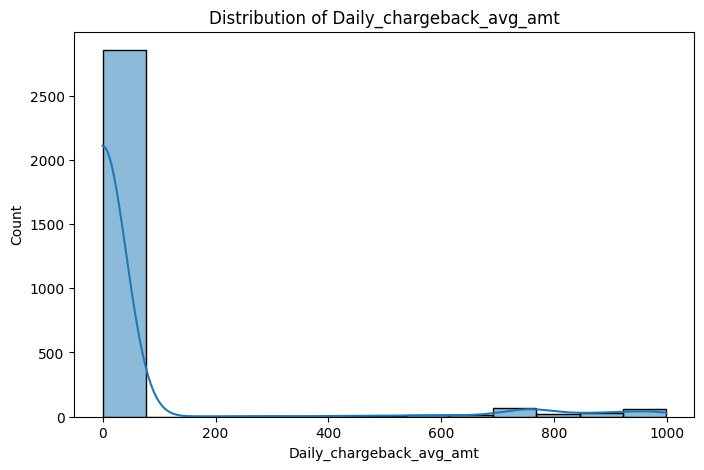



Exploring 6_month_avg_chbk_amt:

Missing Values: 0
Data Type: float64
Basic Statistics:
count    3075.000000
mean       40.022407
std       155.968840
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       998.000000
Name: 6_month_avg_chbk_amt, dtype: float64


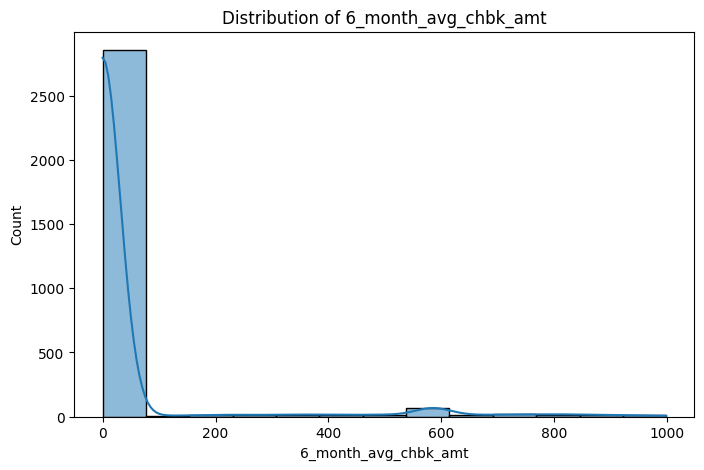



Exploring 6-month_chbk_freq:

Missing Values: 0
Data Type: int64
Basic Statistics:
count    3075.000000
mean        0.391870
std         1.548479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: 6-month_chbk_freq, dtype: float64


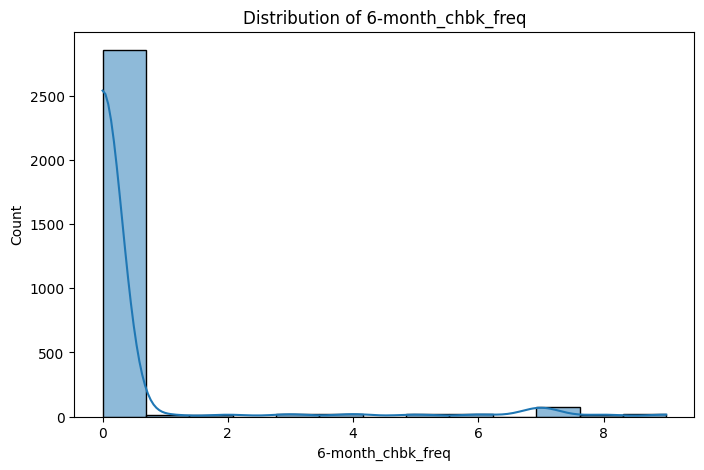



Exploring isFradulent:

Missing Values: 0
Data Type: int64
Basic Statistics:
count    3075.000000
mean        0.145691
std         0.352854
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: isFradulent, dtype: float64


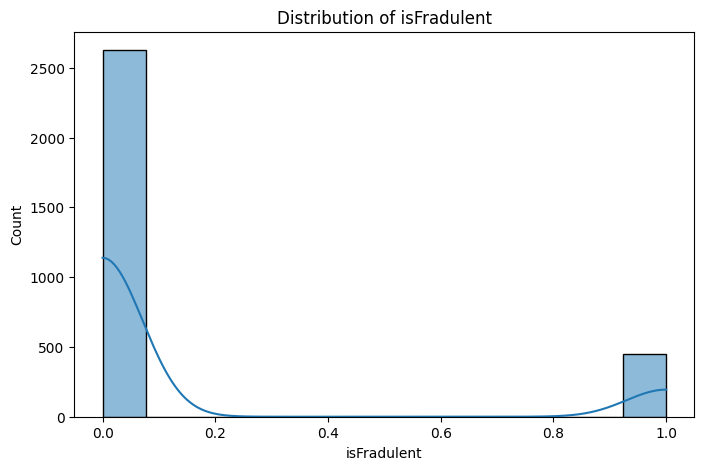

In [58]:
# Explore each column
for column in columns_to_explore:
    print(f"Exploring {column}:\n")

    # Check for missing values
    missing_count = fraud[column].isnull().sum()
    print("Missing Values:", missing_count)

    # Data type
    data_type = fraud[column].dtype
    print("Data Type:", data_type)

    # Basic statistics
    column_stats = fraud[column].describe()
    print("Basic Statistics:")
    print(column_stats)

    # Count plot (for categorical columns)
    if data_type == 'object':
        plt.figure(figsize=(6, 4))
        sns.countplot(x=column, data=fraud)
        plt.title(f'Count Plot of {column}')
        plt.xticks(rotation=45)
        plt.show()
    # Distribution plot (for numerical columns)
    else:
        plt.figure(figsize=(8, 5))
        sns.histplot(data=fraud, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

    print("\n")

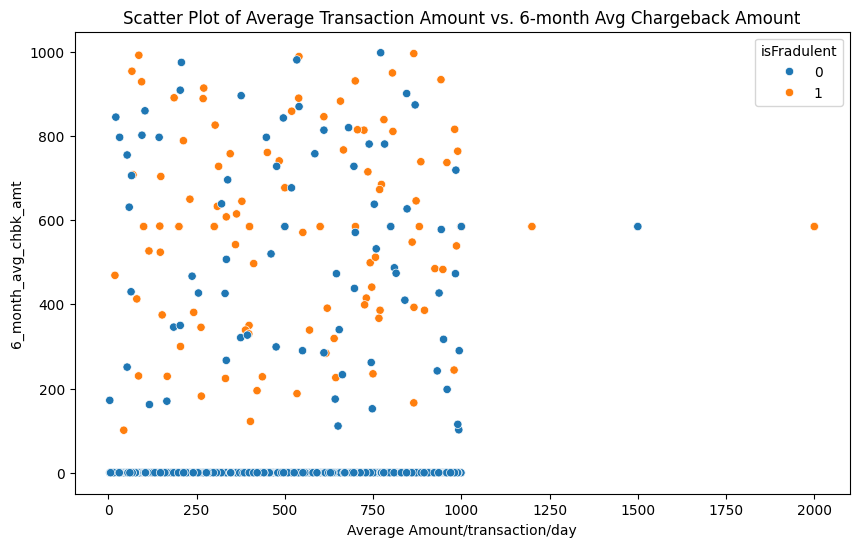

In [60]:
# Scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Amount/transaction/day', y='6_month_avg_chbk_amt', hue='isFradulent', data=fraud)
plt.title('Scatter Plot of Average Transaction Amount vs. 6-month Avg Chargeback Amount')
plt.show()

## Section 3 : Model specific data preprocessing

In [61]:
# Separate features (X) and target (y)

X = fraud.drop(['isFradulent'], axis=1)
y = fraud['isFradulent']

In [62]:
X.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,100.0,3000.0,0,5,1,1,0,0.0,0
1,100.0,4300.0,0,5,1,1,0,0.0,0
2,185.5,4823.0,1,5,0,0,0,0.0,0
3,185.5,5008.5,1,8,0,0,0,0.0,0
4,500.0,26000.0,0,0,1,1,800,677.2,6


In [63]:
y.head()

,isFradulent
0,1
1,1
2,1
3,1
4,1


In [64]:
# This is explicitly used for undersampling.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Apply SMOTE to balance the dataset

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Section 4 : Model building and evaluation

### 1.Random Forest Model Implementation

In [66]:
# Define the parameter grid to search through

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [67]:
# Create a Random Forest classifier

rf_classifier = RandomForestClassifier(random_state=42)

In [68]:
# Create GridSearchCV instance

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

In [69]:
# Fit the model on the resampled training data

grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [73]:
# Get the best parameters

best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [74]:
# Get the best estimator

best_rf_classifier = grid_search.best_estimator_
best_rf_classifier

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [75]:
# Predict on test data using the best estimator
y_pred_best = best_rf_classifier.predict(X_test)

In [79]:
pd.Series(y_pred_best).value_counts()

,count
0,493
1,122


Test Accuracy: 0.9658536585365853
Train Accuracy: 0.9995271867612293
Total Accuracy: 0.9826904226489073
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       512
           1       0.84      0.99      0.91       103

    accuracy                           0.97       615
   macro avg       0.92      0.98      0.94       615
weighted avg       0.97      0.97      0.97       615

Confusion Matrix:
 [[492  20]
 [  1 102]]
Cross-Validation Scores: [0.97399527 0.9858156  0.97990544 0.97990544 0.97163121]


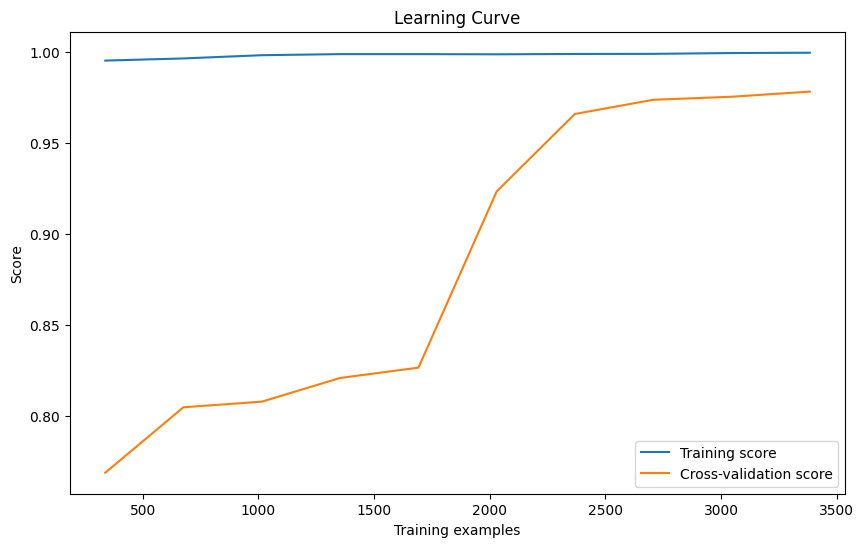

In [80]:
# Calculate accuracy
test_accuracy_best = accuracy_score(y_test, y_pred_best)
train_accuracy_best = accuracy_score(y_train_resampled, best_rf_classifier.predict(X_train_resampled))
total_accuracy_best = (test_accuracy_best + train_accuracy_best) / 2

# Classification Report
class_report_best = classification_report(y_test, y_pred_best)

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Cross-validation scores
cv_scores_best = cross_val_score(best_rf_classifier, X_train_resampled, y_train_resampled, cv=5)
# Print the results

print("Test Accuracy:", test_accuracy_best)
print("Train Accuracy:", train_accuracy_best)
print("Total Accuracy:", total_accuracy_best)
print("Classification Report:\n", class_report_best)
print("Confusion Matrix:\n", conf_matrix_best)
print("Cross-Validation Scores:", cv_scores_best)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_rf_classifier, X_train_resampled, y_train_resampled,
                                                        cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

### 2.Decision Tree Model Implementation

In [81]:
# Create a Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

In [82]:
# Define the parameter grid for hyperparameter tuning

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [83]:
# Create GridSearchCV instance

grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')

In [84]:
# Fit the model on the resampled training data

grid_search_dt.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [85]:
# Get the best estimator
best_dt_classifier = grid_search_dt.best_estimator_
best_dt_classifier

DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                       random_state=42)

In [86]:
# Predict on test data using the best estimator

y_pred_dt = best_dt_classifier.predict(X_test)

In [88]:
pd.Series(y_pred_dt).value_counts()

,count
0,505
1,110


Decision Tree Test Accuracy: 0.9528455284552846
Decision Tree Train Accuracy: 0.9985815602836879
Decision Tree Total Accuracy: 0.9757135443694862
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       512
           1       0.84      0.89      0.86       103

    accuracy                           0.95       615
   macro avg       0.91      0.93      0.92       615
weighted avg       0.95      0.95      0.95       615

Decision Tree Confusion Matrix:
 [[494  18]
 [ 11  92]]
Decision Tree Cross-Validation Scores: [0.96572104 0.9858156  0.97399527 0.9822695  0.97754137]


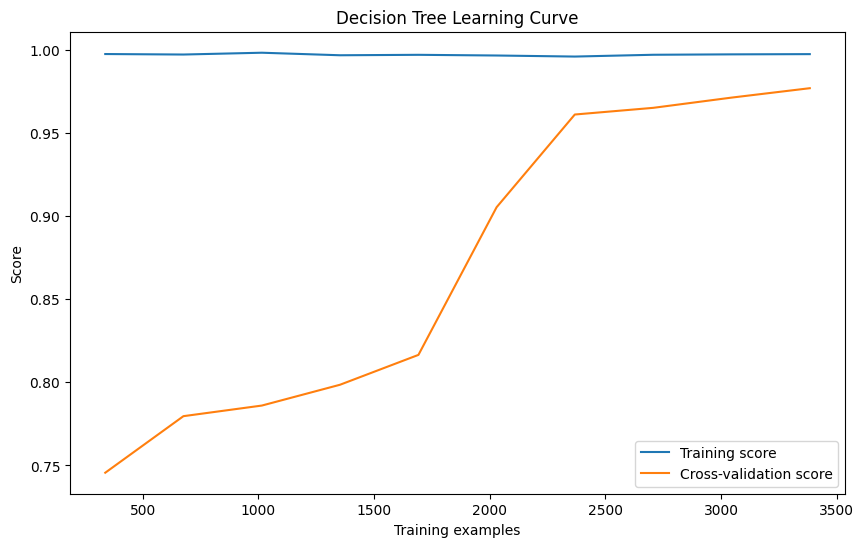

In [89]:
# Calculate accuracy
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
train_accuracy_dt = accuracy_score(y_train_resampled, best_dt_classifier.predict(X_train_resampled))
total_accuracy_dt = (test_accuracy_dt + train_accuracy_dt) / 2

# Classification Report
class_report_dt = classification_report(y_test, y_pred_dt)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Cross-validation scores
cv_scores_dt = cross_val_score(best_dt_classifier, X_train_resampled, y_train_resampled, cv=5)

# Learning Curve
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(best_dt_classifier, X_train_resampled, y_train_resampled,
                                                                  cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
# Print the results
print("Decision Tree Test Accuracy:", test_accuracy_dt)
print("Decision Tree Train Accuracy:", train_accuracy_dt)
print("Decision Tree Total Accuracy:", total_accuracy_dt)
print("Decision Tree Classification Report:\n", class_report_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Cross-Validation Scores:", cv_scores_dt)


# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_dt, np.mean(train_scores_dt, axis=1), label='Training score')
plt.plot(train_sizes_dt, np.mean(test_scores_dt, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Decision Tree Learning Curve')
plt.legend()
plt.show()

### 3.Logistic regression model implementation

In [96]:
# Create a Logistic Regression classifier

lr_classifier = LogisticRegression(random_state=42)

In [97]:
# Define the parameter grid for hyperparameter tuning

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [98]:
# Create GridSearchCV instance

grid_search_lr = GridSearchCV(lr_classifier, param_grid_lr, cv=5, scoring='accuracy')

In [99]:
# Fit the model on the resampled training data

grid_search_lr.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [100]:
# Get the best estimator
best_lr_classifier = grid_search_lr.best_estimator_
best_lr_classifier

LogisticRegression(C=0.1, random_state=42)

In [101]:
# Predict on test data using the best estimator

y_pred_lr = best_lr_classifier.predict(X_test)

In [102]:
pd.Series(y_pred_lr).value_counts()

,count
0,496
1,119


Logistic Regression Test Accuracy: 0.9317073170731708
Logistic Regression Train Accuracy: 0.973758865248227
Logistic Regression Total Accuracy: 0.9527330911606988
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       512
           1       0.76      0.87      0.81       103

    accuracy                           0.93       615
   macro avg       0.87      0.91      0.88       615
weighted avg       0.94      0.93      0.93       615

Logistic Regression Confusion Matrix:
 [[483  29]
 [ 13  90]]
Logistic Regression Cross-Validation Scores: [0.9751773  0.98345154 0.9822695  0.98108747 0.98699764]


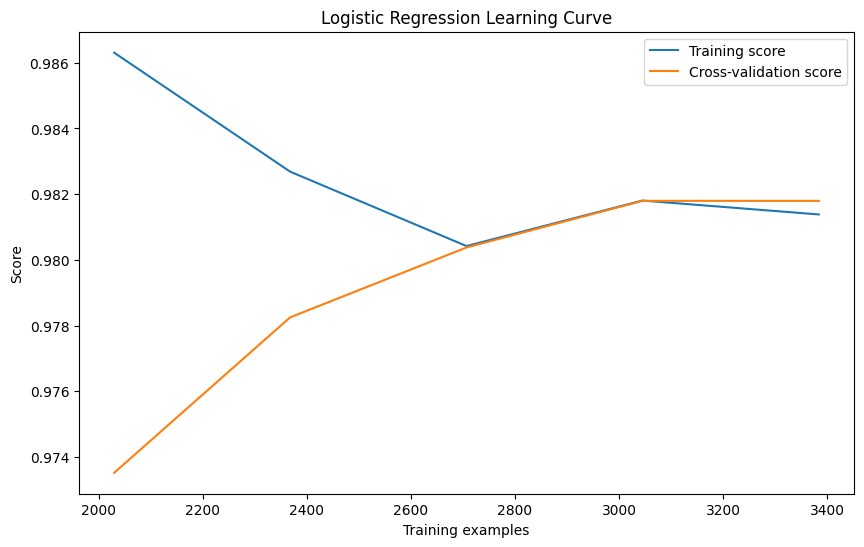

In [103]:
# Calculate accuracy
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
train_accuracy_lr = accuracy_score(y_train_resampled, best_lr_classifier.predict(X_train_resampled))
total_accuracy_lr = (test_accuracy_lr + train_accuracy_lr) / 2

# Classification Report
class_report_lr = classification_report(y_test, y_pred_lr)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Cross-validation scores
cv_scores_lr = cross_val_score(best_lr_classifier, X_train_resampled, y_train_resampled, cv=5)

# Learning Curve
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(best_lr_classifier, X_train_resampled, y_train_resampled,
                                                                  cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Print the results
print("Logistic Regression Test Accuracy:", test_accuracy_lr)
print("Logistic Regression Train Accuracy:", train_accuracy_lr)
print("Logistic Regression Total Accuracy:", total_accuracy_lr)
print("Logistic Regression Classification Report:\n", class_report_lr)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)
print("Logistic Regression Cross-Validation Scores:", cv_scores_lr)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_lr, np.mean(train_scores_lr, axis=1), label='Training score')
plt.plot(train_sizes_lr, np.mean(test_scores_lr, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Logistic Regression Learning Curve')
plt.legend()
plt.show()

### 4. K-Nearest Neighbors (KNN) Model implementation

In [104]:
# Create a KNN classifier

knn_classifier = KNeighborsClassifier()

In [105]:
# Define the parameter grid for hyperparameter tuning

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

In [106]:
# Create GridSearchCV instance

grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')

In [107]:
# Fit the model on the resampled training data

grid_search_knn.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [108]:
# Get the best estimator

best_knn_classifier = grid_search_knn.best_estimator_
best_knn_classifier

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [109]:
# Predict on test data using the best estimator

y_pred_knn = best_knn_classifier.predict(X_test)

In [110]:
pd.Series(y_pred_knn).value_counts()

,count
0,501
1,114


K-Nearest Neighbors Test Accuracy: 0.8975609756097561
K-Nearest Neighbors Train Accuracy: 1.0
K-Nearest Neighbors Total Accuracy: 0.948780487804878
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       512
           1       0.68      0.75      0.71       103

    accuracy                           0.90       615
   macro avg       0.81      0.84      0.82       615
weighted avg       0.90      0.90      0.90       615

K-Nearest Neighbors Confusion Matrix:
 [[475  37]
 [ 26  77]]
K-Nearest Neighbors Cross-Validation Scores: [0.94089835 0.94562648 0.94444444 0.95035461 0.95035461]


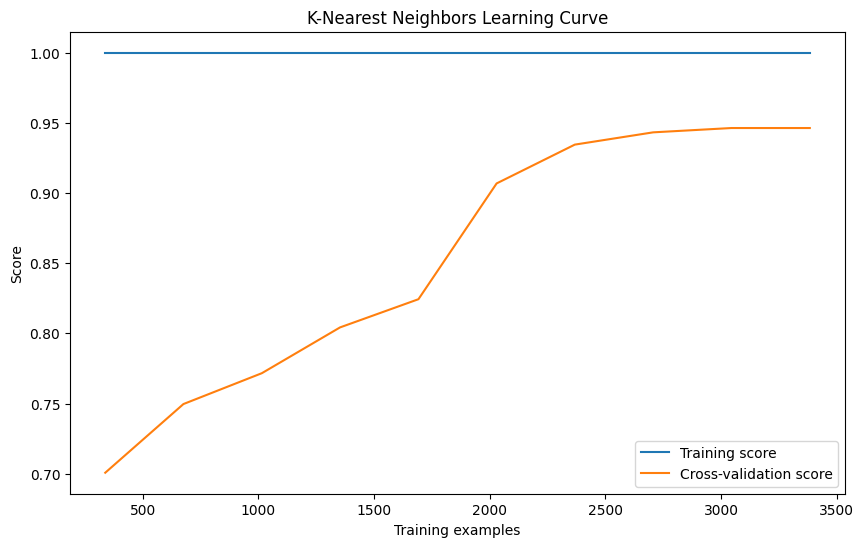

In [111]:
# Calculate accuracy
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
train_accuracy_knn = accuracy_score(y_train_resampled, best_knn_classifier.predict(X_train_resampled))
total_accuracy_knn = (test_accuracy_knn + train_accuracy_knn) / 2

# Classification Report
class_report_knn = classification_report(y_test, y_pred_knn)

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Cross-validation scores
cv_scores_knn = cross_val_score(best_knn_classifier, X_train_resampled, y_train_resampled, cv=5)

# Learning Curve
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(best_knn_classifier, X_train_resampled, y_train_resampled,
                                                                    cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
# Print the results
print("K-Nearest Neighbors Test Accuracy:", test_accuracy_knn)
print("K-Nearest Neighbors Train Accuracy:", train_accuracy_knn)
print("K-Nearest Neighbors Total Accuracy:", total_accuracy_knn)
print("K-Nearest Neighbors Classification Report:\n", class_report_knn)
print("K-Nearest Neighbors Confusion Matrix:\n", conf_matrix_knn)
print("K-Nearest Neighbors Cross-Validation Scores:", cv_scores_knn)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_knn, np.mean(train_scores_knn, axis=1), label='Training score')
plt.plot(train_sizes_knn, np.mean(test_scores_knn, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('K-Nearest Neighbors Learning Curve')
plt.legend()
plt.show()

Implementaion and Evaluation of Deep Learning Model

 ### 5. CNN Model

In [112]:
# Assuming data in X (a DataFrame) and y (a Series)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Apply SMOTE to balance the dataset

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [114]:
# Convert DataFrame to NumPy arrays

X_train_resampled = X_train_resampled.values
X_test = X_test.values
y_train_resampled = y_train_resampled.values
y_test = y_test.values

In [118]:
type(X_train_resampled) , type(X_test) , type(y_train_resampled) , type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [119]:
# Reshape the data for CNN

X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [120]:
# Create the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 7, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
# Define cross-validation strategy

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [124]:
# Lists to store results

cv_scores_cnn = []
train_acc_scores_cnn = []
test_acc_scores_cnn = []

In [125]:
%%time
# Perform cross-validation
for train_idx, val_idx in cv.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled[train_idx], X_train_resampled[val_idx]
    y_train_fold, y_val_fold = y_train_resampled[train_idx], y_train_resampled[val_idx]

    # Train the CNN model
    cnn_model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Evaluate on validation set
    val_predictions = (cnn_model.predict(X_val_fold) > 0.5).astype(int)
    val_acc = accuracy_score(y_val_fold, val_predictions)
    cv_scores_cnn.append(val_acc)

    # Calculate training and testing accuracy
    train_acc = accuracy_score(y_train_fold, (cnn_model.predict(X_train_fold) > 0.5).astype(int))
    test_acc = accuracy_score(y_test, (cnn_model.predict(X_test) > 0.5).astype(int))
    train_acc_scores_cnn.append(train_acc)
    test_acc_scores_cnn.append(test_acc)

# Print the cross-validation scores
print("Cross-Validation Scores (CNN):", cv_scores_cnn)

# Print training and testing accuracy
print("Training Accuracies (CNN):", train_acc_scores_cnn)
print("Testing Accuracies (CNN):", test_acc_scores_cnn)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Cross-Validation Scores (CNN): [0.9231678486997635, 0.9385342789598109, 0.933806146572104, 0.9728132387706856, 0.9527186761229315]
Training Accuracies (CNN): [0.9364657210401891, 0.9355791962174941, 0.9382387706855791, 0.9666075650118203, 0.9515366430260047]
Testing Accuracies (CNN): [0.865040650406504, 0.8666666666666667, 0.8747967479674796, 0.9349593495934959, 0.8943089430894309]
CPU times: 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


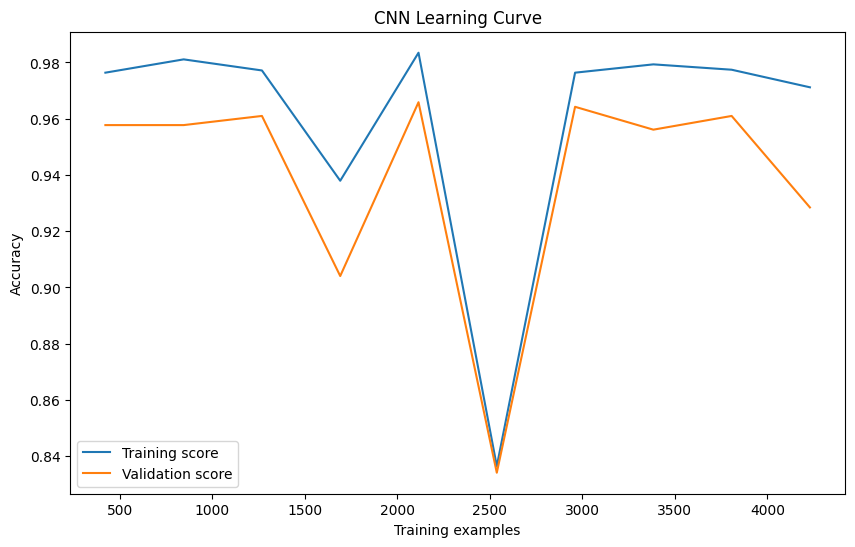

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
CNN Training Accuracy: 0.9711583924349881
CNN Testing Accuracy: 0.9284552845528455
CNN Total Accuracy: 0.9498068384939169
Classification Report (CNN):
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       512
           1       0.73      0.91      0.81       103

    accuracy                           0.93       615
   macro avg       0.86      0.92      0.88       615
weighted avg       0.94      0.93      0.93       615

Confusion Matrix (CNN):
 [[477  35]
 [  9  94]]


In [126]:
# Lists to store learning curve data
train_sizes_cnn, train_scores_cnn, val_scores_cnn = [], [], []

# Define different training sizes
training_sizes = np.linspace(0.1, 1.0, 10)

# Perform learning curve
for train_size in training_sizes:
    num_samples = int(train_size * X_train_resampled.shape[0])
    X_train_subset = X_train_resampled[:num_samples]
    y_train_subset = y_train_resampled[:num_samples]

    cnn_model.fit(X_train_subset, y_train_subset, epochs=10, batch_size=32, verbose=0)

    train_acc = accuracy_score(y_train_subset, (cnn_model.predict(X_train_subset) > 0.5).astype(int))
    val_acc = accuracy_score(y_test, (cnn_model.predict(X_test) > 0.5).astype(int))

    train_sizes_cnn.append(num_samples)
    train_scores_cnn.append(train_acc)
    val_scores_cnn.append(val_acc)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_cnn, train_scores_cnn, label='Training score')
plt.plot(train_sizes_cnn, val_scores_cnn, label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('CNN Learning Curve')
plt.legend()
plt.show()

# Classification Report
cnn_predictions_binary = (cnn_model.predict(X_test) > 0.5).astype(int)
class_report_cnn = classification_report(y_test, cnn_predictions_binary)

# Confusion Matrix
conf_matrix_cnn = confusion_matrix(y_test, cnn_predictions_binary)

# Calculate training and testing accuracy
train_accuracy_cnn = accuracy_score(y_train_resampled, (cnn_model.predict(X_train_resampled) > 0.5).astype(int))
test_accuracy_cnn = accuracy_score(y_test, cnn_predictions_binary)
total_accuracy_cnn = (train_accuracy_cnn + test_accuracy_cnn) / 2

# Print the results
print("CNN Training Accuracy:", train_accuracy_cnn)
print("CNN Testing Accuracy:", test_accuracy_cnn)
print("CNN Total Accuracy:", total_accuracy_cnn)
print("Classification Report (CNN):\n", class_report_cnn)
print("Confusion Matrix (CNN):\n", conf_matrix_cnn)


### 6. RNN Model

In [127]:
# Assuming data in X (a DataFrame) and y (a Series)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
# Apply SMOTE to balance the dataset

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [129]:
# Convert DataFrame to NumPy arrays

X_train_resampled = X_train_resampled.values
X_test = X_test.values
y_train_resampled = y_train_resampled.values
y_test = y_test.values

In [130]:
# Reshape the data for RNN

X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [131]:
# Create the RNN model

rnn_model = Sequential()
rnn_model.add(LSTM(units=64, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,121 (82.50 KB)

 Trainable params: 21,121 (82.50 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
# Define cross-validation strategy

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [134]:
# Lists to store results

cv_scores_rnn = []
train_acc_scores_rnn = []
test_acc_scores_rnn = []

In [135]:
# Perform cross-validation
for train_idx, val_idx in cv.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled[train_idx], X_train_resampled[val_idx]
    y_train_fold, y_val_fold = y_train_resampled[train_idx], y_train_resampled[val_idx]

    # Train the RNN model
    rnn_model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Evaluate on validation set
    val_predictions = (rnn_model.predict(X_val_fold) > 0.5).astype(int)
    val_acc = accuracy_score(y_val_fold, val_predictions)
    cv_scores_rnn.append(val_acc)

    # Calculate training and testing accuracy
    train_acc = accuracy_score(y_train_fold, (rnn_model.predict(X_train_fold) > 0.5).astype(int))
    test_acc = accuracy_score(y_test, (rnn_model.predict(X_test) > 0.5).astype(int))
    train_acc_scores_rnn.append(train_acc)
    test_acc_scores_rnn.append(test_acc)

# Print the cross-validation scores
print("Cross-Validation Scores (RNN):", cv_scores_rnn)

# Print training and testing accuracy
print("Training Accuracies (RNN):", train_acc_scores_rnn)
print("Testing Accuracies (RNN):", test_acc_scores_rnn)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Cross-Validation Scores (RNN): [0.8085106382978723, 0.776595744680851, 0.7825059101654847, 0.7683215130023641, 0.7659574468085106]
Training Accuracies (RNN): [0.7972813238770685, 0.7624113475177305, 0.7966903073286052, 0.7700945626477541, 0.7641843971631206]
Testing Accuracies (RNN): [0.6829268292682927, 0.767479674796748, 0.8097560975609757, 0.7658536585365854, 0.8910569105691057]


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


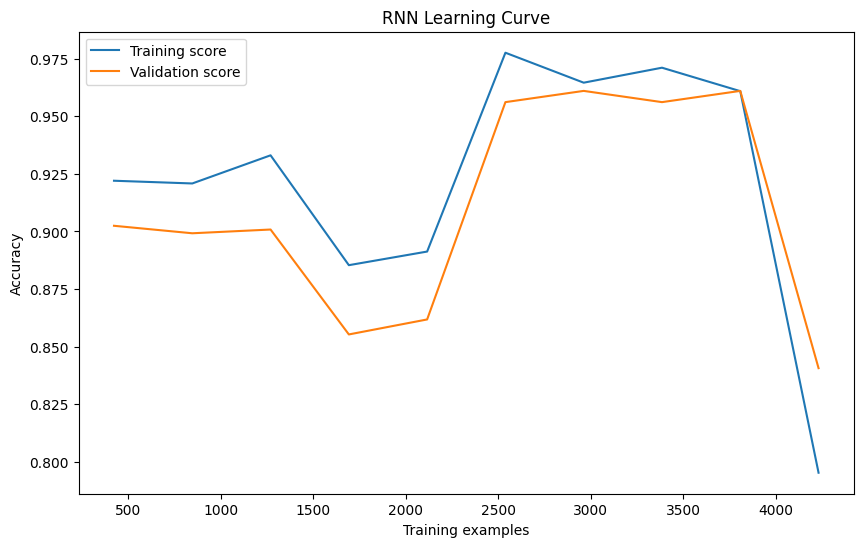

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RNN Training Accuracy: 0.7952718676122932
RNN Testing Accuracy: 0.8406504065040651
RNN Total Accuracy: 0.8179611370581792
Classification Report (RNN):
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       512
           1       0.52      0.76      0.61       103

    accuracy                           0.84       615
   macro avg       0.73      0.81      0.76       615
weighted avg       0.87      0.84      0.85       615

Confusion Matrix (RNN):
 [[439  73]
 [ 25  78]]


In [136]:
# Lists to store learning curve data
train_sizes_rnn, train_scores_rnn, val_scores_rnn = [], [], []

# Define different training sizes
training_sizes = np.linspace(0.1, 1.0, 10)

# Perform learning curve
for train_size in training_sizes:
    num_samples = int(train_size * X_train_resampled.shape[0])
    X_train_subset = X_train_resampled[:num_samples]
    y_train_subset = y_train_resampled[:num_samples]

    rnn_model.fit(X_train_subset, y_train_subset, epochs=10, batch_size=32, verbose=0)

    train_acc = accuracy_score(y_train_subset, (rnn_model.predict(X_train_subset) > 0.5).astype(int))
    val_acc = accuracy_score(y_test, (rnn_model.predict(X_test) > 0.5).astype(int))

    train_sizes_rnn.append(num_samples)
    train_scores_rnn.append(train_acc)
    val_scores_rnn.append(val_acc)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rnn, train_scores_rnn, label='Training score')
plt.plot(train_sizes_rnn, val_scores_rnn, label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('RNN Learning Curve')
plt.legend()
plt.show()

# Classification Report
rnn_predictions_binary = (rnn_model.predict(X_test) > 0.5).astype(int)
class_report_rnn = classification_report(y_test, rnn_predictions_binary)

# Confusion Matrix
conf_matrix_rnn = confusion_matrix(y_test, rnn_predictions_binary)

# Calculate training and testing accuracy
train_accuracy_rnn = accuracy_score(y_train_resampled, (rnn_model.predict(X_train_resampled) > 0.5).astype(int))
test_accuracy_rnn = accuracy_score(y_test, rnn_predictions_binary)
total_accuracy_rnn = (train_accuracy_rnn + test_accuracy_rnn) / 2

# Print the results
print("RNN Training Accuracy:", train_accuracy_rnn)
print("RNN Testing Accuracy:", test_accuracy_rnn)
print("RNN Total Accuracy:", total_accuracy_rnn)
print("Classification Report (RNN):\n", class_report_rnn)
print("Confusion Matrix (RNN):\n", conf_matrix_rnn)

# Section 5 : Model comparison and visualization

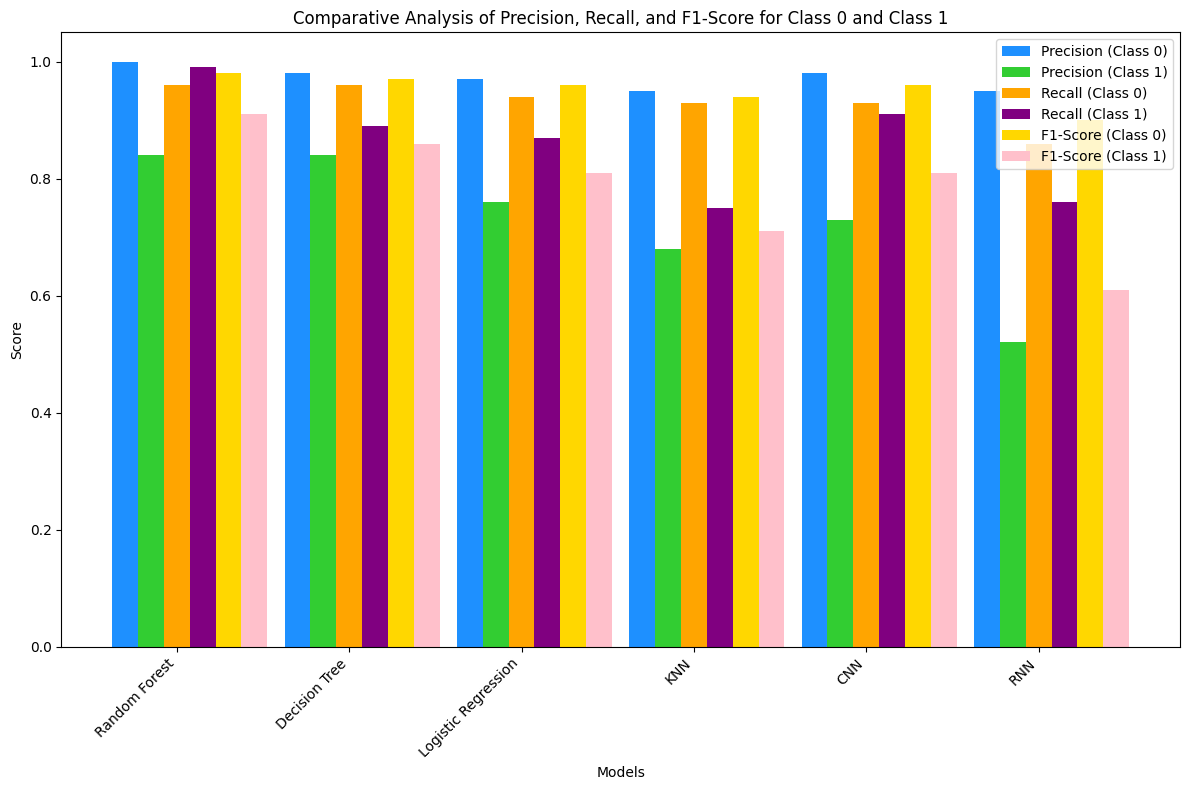

In [137]:
# Data
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN', 'CNN', 'RNN']
precision_class_0 = [1.00, 0.98, 0.97, 0.95, 0.98, 0.95]
precision_class_1 = [0.84, 0.84, 0.76, 0.68, 0.73, 0.52]
recall_class_0 = [0.96, 0.96, 0.94, 0.93, 0.93, 0.86]
recall_class_1 = [0.99, 0.89, 0.87, 0.75, 0.91, 0.76]
f1_score_class_0 = [0.98, 0.97, 0.96, 0.94, 0.96, 0.90]
f1_score_class_1 = [0.91, 0.86, 0.81, 0.71, 0.81, 0.61]

x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - 2*width, precision_class_0, width, label='Precision (Class 0)', color='dodgerblue')
rects2 = ax.bar(x - width, precision_class_1, width, label='Precision (Class 1)', color='limegreen')
rects3 = ax.bar(x, recall_class_0, width, label='Recall (Class 0)', color='orange')
rects4 = ax.bar(x + width, recall_class_1, width, label='Recall (Class 1)', color='purple')
rects5 = ax.bar(x + 2*width, f1_score_class_0, width, label='F1-Score (Class 0)', color='gold')
rects6 = ax.bar(x + 3*width, f1_score_class_1, width, label='F1-Score (Class 1)', color='pink')

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Comparative Analysis of Precision, Recall, and F1-Score for Class 0 and Class 1')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [145]:
# Assuming both lists have the same length
average_precision = [(x + y) / 2 for x, y in zip(precision_class_0, precision_class_1)]

print(average_precision)

# Assuming both lists have the same length
average_recall = [(x + y) / 2 for x, y in zip(recall_class_0, recall_class_1)]

print(average_recall)

# Assuming both lists have the same length
average_f1_score = [(x + y) / 2 for x, y in zip(f1_score_class_0, f1_score_class_1)]

print(average_f1_score)



[0.9199999999999999, 0.9099999999999999, 0.865, 0.815, 0.855, 0.735]
[0.975, 0.925, 0.905, 0.8400000000000001, 0.92, 0.81]
[0.9450000000000001, 0.915, 0.885, 0.825, 0.885, 0.755]


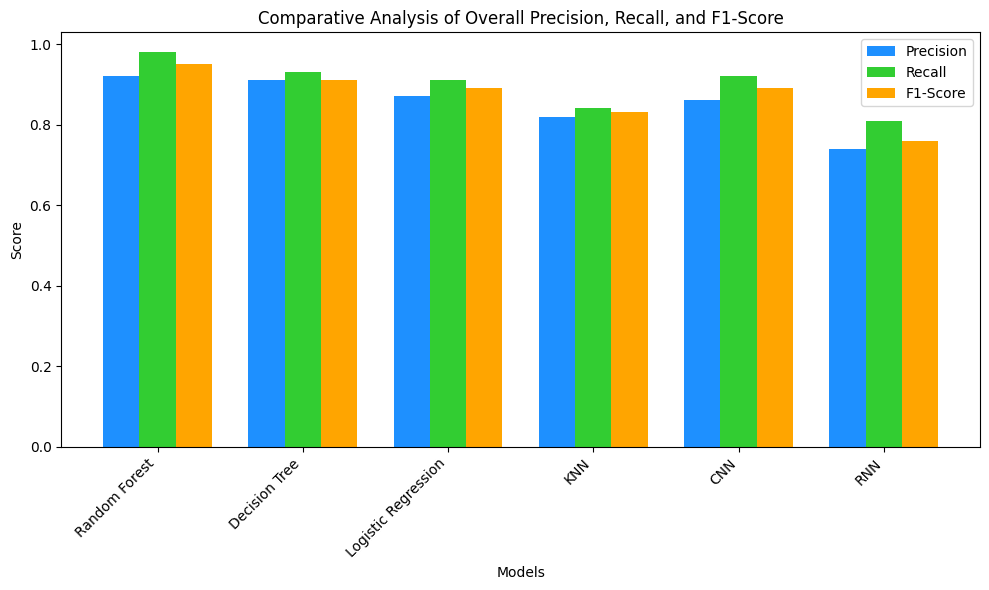

In [146]:
# Data
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN', 'CNN', 'RNN']
precision = [0.92, 0.91, 0.87, 0.82, 0.86, 0.74]  # Average of precision_class_0 and precision_class_1
recall = [0.98, 0.93, 0.91, 0.84, 0.92, 0.81]  # Average of recall_class_0 and recall_class_1
f1_score = [0.95, 0.91, 0.89, 0.83, 0.89, 0.76]  # Average of f1_score_class_0 and f1_score_class_1

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, precision, width, label='Precision', color='dodgerblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='limegreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Comparative Analysis of Overall Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

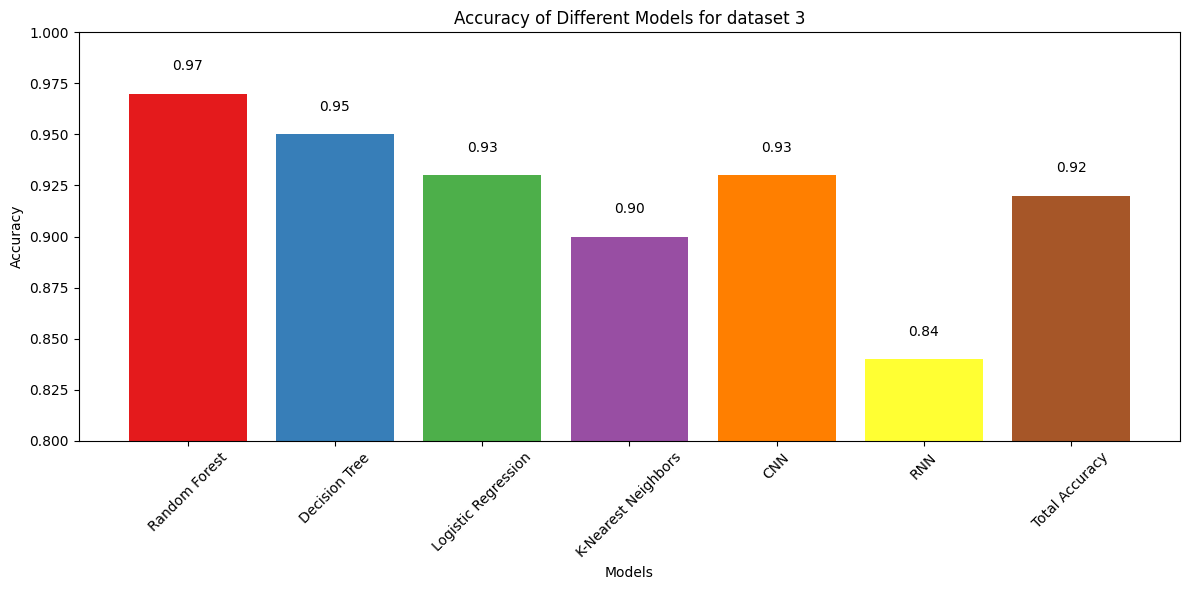

In [160]:
# Model names
models = ["Random Forest", "Decision Tree", "Logistic Regression", "K-Nearest Neighbors", "CNN", "RNN"]

# Accuracy values
accuracies = [0.97, 0.95, 0.93, 0.90, 0.93, 0.84]

# Total accuracy
total_accuracy = sum(accuracies) / len(accuracies)

# Append "Total Accuracy" to models
models.append("Total Accuracy")

# Append the total_accuracy value to accuracies
accuracies.append(total_accuracy)

colors = sns.color_palette('Set1', len(models))

# Create a bar chart
plt.figure(figsize=(12, 6))
# Use color argument instead of palette, choose a single color or a list of colors for each bar
plt.bar(models, accuracies, color=colors)  # You can change 'skyblue' to your preferred color

# Add value labels above each bar
for i, value in enumerate(accuracies):
  plt.text(i, value + 0.01, f"{value:.2f}", ha='center', va='bottom')  # Adjust offset and alignment as needed

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models for dataset 3')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()